In [6]:
import torch

from model import TCN

In [7]:
model = torch.load('model.pt')
# model

In [8]:
torch.manual_seed(0)

B = 1
T = 50
H = 100
input = torch.randn(H).expand(B, T, H).transpose(1, 2).to("cuda")
print(input[0,0,:].sum())
# input = 10 * torch.ones(B, H, T).to("cuda")
# input[:,0, :] = 1

output = model.decoder(model.tcn(input).transpose(1, 2)).detach().cpu().numpy()
output.shape
memory = output[0,1:,:] - output[0,:-1,:]
memory.shape

tensor(-56.2920, device='cuda:0')


(49, 49)

10.083642601966858

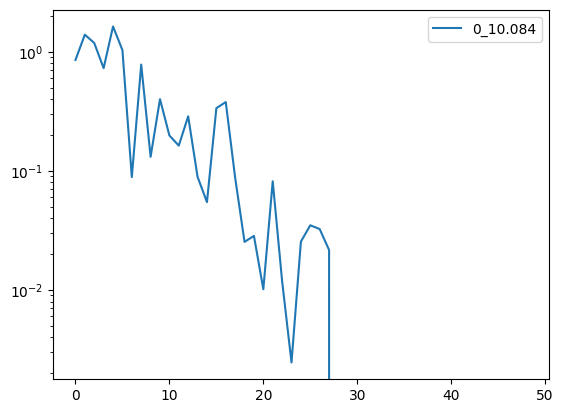

In [9]:
import matplotlib.pyplot as plt

count = 0
memory_strength_total = 0
for j in range(1):
    memory_strength = sum(abs(memory[:, j]))
    if memory_strength >= 0.5:
        plt.plot(abs(memory[:,j]), label=f"{j}_{memory_strength:.3f}")
        count += 1
    memory_strength_total += memory_strength
plt.legend()
plt.yscale('log')
memory_strength_total

In [10]:
count

1